# TALLERES ETR 2021-2: AUTOMATIZA LAS TAREAS ABURRIDAS USANDO PYTHON
## Ing. Gerardo Becerra, Ph.D.
## Octubre 2 de 2021 


## Envío de Correos Electrónicos Personalizados
Podemos usar Python junto con la librería `smtplib` para enviar mensajes de correo personalizados de una manera fácil y rápida.

En primer lugar, se importan las librerías que se utilizarán para preparar y enviar el mensaje.

In [1]:
import smtplib, ssl    # Librerías para conectarse al servidor y enviar el mensaje
from email.mime.text import MIMEText   # Librerías para la creación del mensaje
from email.mime.multipart import MIMEMultipart
from getpass import getpass   # Librería para capturar la contraseña
import pandas as pd      # Libería para leer el archivo con los datos de los destinatarios

Luego, se crean las versiones en texto plano y HTML del mensaje prototipo.  
Note los rótulos que se utilizan para identificar los campos personalizables dentro del mensaje.

In [2]:
# Mensaje en texto plano
texto = """\
Cordial saludo, {name}.

Soy Gerardo Becerra, docente de la ECBTI en la UNAD y presentador del taller Automatiza las tareas aburridas usando Python.

Usted ha registrado su asistencia al evento con los siguientes datos:

- Nombres: {name}.
- Apellidos: {lname}.
- Correo electrónico: {email}.
- Estamento: {estam}.

Espero que este taller sea de gran utilidad para usted.

Atentamente,

Gerardo Becerra.

"""
# Mensaje en HTML
html = """\
<html>
    <body>
        <p>Cordial saludo, {name}.</p>
        <p>Soy Gerardo Becerra, docente de la ECBTI en la UNAD y presentador del taller <b>Automatiza las tareas aburridas usando Python</b>.</p>
        <p>Usted ha registrado su asistencia al evento con los siguientes datos:</p>
        <ul>
            <li>Nombres: {name}.</li>
            <li>Apellidos: {lname}.</li>
            <li>Correo electrónico: {email}.</li>
            <li>Estamento: {estam}.</li>
        </ul>
        <p>Espero que este taller sea de gran utilidad para usted.</p>
        <p>Atentamente,</p>
        <p>Gerardo Becerra.</p>    
    </body>
</html>
"""

Se utiliza la librería `Pandas` para leer el archivo xlsx donde se encuentran los datos de los destinatarios del mensaje

In [7]:
asistentes = pd.read_excel("Talleres ETR 2021-2 - Automatiza las tareas aburridas usando Python - Registro de Asistencia (Responses).xlsx",\
             sheet_name="Form Responses 1",\
             header=0,index_col=0,usecols="B:F")

In [8]:
asistentes

,Nombres,Apellidos,Correo electrónico,Estamento
Número de identificación,,,,
79957292,Gerardo de Jesús,Becerra Becerra,gerardo.becerra@unad.edu.co,Docente
10914883931,Andrés,Raigosa Rojas,andres3033@hotmail.com,Estudiante
12227752,FABIO,OSSA ORTEGA,fabioossa27@gmail.com,Docente
40780402,Jasmin Emilse,Cuéllar Castrillón,jasmin.cuellar@unad.edu.co,Docente
1075236777,Laura Milena,Parra Vargas,parralauramilena@gmail.com,Estudiante


Se definen los datos básicos de la cuenta de correo del remitente: dirección y contraseña.

In [9]:
email_envia = "taller.python.unad@gmail.com"
password = getpass()

··········


Para cada destinatario se leen los datos registrados en el archivo xlsx, se insertan dentro de la plantilla del mensaje preparado previamente y se envía el mensaje.

In [10]:
# Para cada destinatario lee los datos (nombres, apellidos, correo, estamento)
for nombres, apellidos, correo, estamento in zip(asistentes['Nombres'],\
    asistentes['Apellidos'],asistentes['Correo electrónico'],asistentes['Estamento']):    
    email_recibe = correo

    # Prepara el mensaje
    mensaje = MIMEMultipart("alternative")
    mensaje["Subject"] = "Mensaje de correo personalizado"
    mensaje["From"] = email_envia
    mensaje["To"] = email_recibe

    # Se insertan los datos en la plantilla y se convierte el HTML/texto plano a objetos MIMEText
    part1 = MIMEText(texto.format(name=nombres,lname=apellidos,email=correo,estam=estamento), "plain")
    part2 = MIMEText(html.format(name=nombres,lname=apellidos,email=correo,estam=estamento), "html")    

    # Agrega las partes HTML/texto plano al mensaje MIMEMultipart
    mensaje.attach(part1)
    mensaje.attach(part2)

    # Crea una conexión segura con el servidor usando SSL y se conecta al servidor
    context = ssl.create_default_context()
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        # Envía el mensaje de correo
        print(f"Enviando correo a {nombres} {apellidos}")
        server.login(email_envia, password)
        server.sendmail(
            email_envia, email_recibe, mensaje.as_string()
        )
print('Proceso finalizado exitosamente.')

Enviando correo a Gerardo de Jesús Becerra Becerra
Enviando correo a Andrés  Raigosa Rojas
Enviando correo a FABIO  OSSA ORTEGA
Enviando correo a Jasmin Emilse  Cuéllar Castrillón
Enviando correo a Laura Milena  Parra Vargas
Proceso finalizado exitosamente.


## Gestión de Archivos
En este ejemplo vamos a organizar los archivos que se encuentran en la carpeta **Descargas** en subdirectorios dependiendo del tipo del archivo.

Se importan las librerías para gestionar los archivos.

In [1]:
import os
from shutil import move

Se configuran las rutas de los directorios donde se encuentran los archivos que se desean organizar.

In [2]:
root_dir = '/content/Descargas/'
image_dir = '/content/Descargas/imagenes'
documents_dir = '/content/Descargas/documentos'
others_dir = '/content/Descargas/otros'
software_dir = '/content/Descargas/software'

Se configuran las listas con las extensiones de los diferentes tipos de archivos a organizar.

In [3]:
doc_types = ('.doc', '.docx', '.txt', '.pdf', '.xls', '.ppt', '.xlsx', '.pptx','html')
img_types = ('.jpg', '.jpeg', '.png', '.svg', '.gif', '.tif', '.tiff')
software_types = ('.exe', '.pkg', '.dmg', 'deb', 'tgz')

Se define una función que entrega la lista de archivos que se van a organizar.

In [4]:
def get_non_hidden_files_except_current_file(root_dir):
    return [f for f in os.listdir(root_dir) if os.path.isfile(os.path.join(root_dir,f)) and not f.startswith('.')]

In [5]:
files = get_non_hidden_files_except_current_file(root_dir)
files

['etapa2-carlos-chaparro.docx',
 'qrcode_docs.google.com.png',
 'FormatoAPAGeneral.docx',
 'Sabana_de_notas_954_243005_354648 (1).xlsx',
 'UNAD_OAI_Evaluacion_Por_Acreditador_90696 (1).pdf',
 'email-calanders-and-instant-messaging-400255669.jpg',
 'hopsan_2.19.0.20210510.1936_focal_amd64.deb',
 'watch.html',
 'WolframPlayer_12.3.1_LINUX.sh',
 'xp-pen-pentablet_3.1.0.210331-1.x86_64.deb.zip',
 'Sistemas Hidroneumaticos.pptx',
 'Sistemas Hidráulicos.jpg',
 'data.csv',
 'Talleres ETR 2021-2 - Automatiza las tareas aburridas usando Python - Registro de Asistencia (Responses).xlsx',
 'bigstock-Question-Mark-114454214.jpg',
 'image_2021_08_30T16_22_47_836Z.png',
 'O.P COSTOS FIDUCIA.pdf']

Se define una función que verifica la extensión de cada archivo y lo mueve al directorio correspondiente.

In [6]:
def move_files(files):
  for file in files:
    # file moved and overwritten if already exists
    if file.endswith(doc_types):
      if not os.path.exists(documents_dir):
        os.makedirs(documents_dir)
      move(os.path.join(root_dir,file), os.path.join(documents_dir,file))
      print(f'Archivo {file} movido a {documents_dir}')
    elif file.endswith(img_types):
      if not os.path.exists(image_dir):
        os.makedirs(image_dir)
      move(os.path.join(root_dir,file), os.path.join(image_dir,file))
      print(f'Archivo {file} movido a {image_dir}')
    elif file.endswith(software_types):
      if not os.path.exists(software_dir):
        os.makedirs(software_dir)
      move(os.path.join(root_dir,file), os.path.join(software_dir,file))
      print(f'Archivo {file} movido a {software_dir}')
    else:
      if not os.path.exists(others_dir):
        os.makedirs(others_dir)
      move(os.path.join(root_dir,file), os.path.join(others_dir,file))
      print(f'Archivo {file} movido a {others_dir}')

Obtiene la lista de archivos que se encuentran en el directorio **Descargas** y los mueve a los directorios correspondientes.

In [7]:
files = get_non_hidden_files_except_current_file(root_dir)
move_files(files)

Archivo etapa2-carlos-chaparro.docx movido a /content/Descargas/documentos
Archivo qrcode_docs.google.com.png movido a /content/Descargas/imagenes
Archivo FormatoAPAGeneral.docx movido a /content/Descargas/documentos
Archivo Sabana_de_notas_954_243005_354648 (1).xlsx movido a /content/Descargas/documentos
Archivo UNAD_OAI_Evaluacion_Por_Acreditador_90696 (1).pdf movido a /content/Descargas/documentos
Archivo email-calanders-and-instant-messaging-400255669.jpg movido a /content/Descargas/imagenes
Archivo hopsan_2.19.0.20210510.1936_focal_amd64.deb movido a /content/Descargas/software
Archivo watch.html movido a /content/Descargas/documentos
Archivo WolframPlayer_12.3.1_LINUX.sh movido a /content/Descargas/otros
Archivo xp-pen-pentablet_3.1.0.210331-1.x86_64.deb.zip movido a /content/Descargas/otros
Archivo Sistemas Hidroneumaticos.pptx movido a /content/Descargas/documentos
Archivo Sistemas Hidráulicos.jpg movido a /content/Descargas/imagenes
Archivo data.csv movido a /content/Descargas

## Compilación de Datos y Generación de Reportes
Para este caso se toman los datos de casos positivos COVID registrados en la base de datos del [Instituto Nacional de Salud (INS)](https://www.ins.gov.co), para procesarlos y genera un reporte.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

En primer lugar, se realiza una solicitud al sitio web del INS la cual retorna un archivo `json` con los datos. Dichos datos se almacenan en una tabla.

In [2]:
df = pd.read_json('https://www.datos.gov.co/resource/gt2j-8ykr.json?$select=fecha_reporte_web,edad,sexo,recuperado&$limit=10000000')

Los datos descargados son los siguientes:

In [3]:
data = df
data

,fecha_reporte_web,edad,sexo,recuperado
0,6/3/2020 0:00:00,19,F,Recuperado
1,9/3/2020 0:00:00,34,M,Recuperado
2,9/3/2020 0:00:00,50,F,Recuperado
3,11/3/2020 0:00:00,55,M,Recuperado
4,11/3/2020 0:00:00,25,M,Recuperado
...,...,...,...,...
4959139,1/10/2021 0:00:00,17,F,Activo
4959140,1/10/2021 0:00:00,30,M,Activo
4959141,1/10/2021 0:00:00,34,M,Activo
4959142,1/10/2021 0:00:00,44,M,Activo


In [6]:
data['recuperado'].unique()

array(['recuperado', 'fallecido', 'n/a', 'activo'], dtype=object)

Se ajusta el formato de las columnas fecha y recuperado.

In [5]:
data['fecha_reporte_web'] = pd.to_datetime(data['fecha_reporte_web'],format="%d/%m/%Y %H:%M:%S")
data['recuperado'] = data['recuperado'].str.lower()
data

,fecha_reporte_web,edad,sexo,recuperado
0,2020-03-06,19,F,recuperado
1,2020-03-09,34,M,recuperado
2,2020-03-09,50,F,recuperado
3,2020-03-11,55,M,recuperado
4,2020-03-11,25,M,recuperado
...,...,...,...,...
4959139,2021-10-01,17,F,activo
4959140,2021-10-01,30,M,activo
4959141,2021-10-01,34,M,activo
4959142,2021-10-01,44,M,activo


In [7]:
data.head(20)

,fecha_reporte_web,edad,sexo,recuperado
0,2020-03-06,19,F,recuperado
1,2020-03-09,34,M,recuperado
2,2020-03-09,50,F,recuperado
3,2020-03-11,55,M,recuperado
4,2020-03-11,25,M,recuperado
5,2020-03-11,27,F,recuperado
6,2020-03-11,85,F,recuperado
7,2020-03-11,22,F,recuperado
8,2020-03-11,28,F,recuperado
9,2020-03-12,36,F,recuperado


Para obtener la primera figura, se agrupan los datos por fecha para obtener el conteo de casos diarios reportados desde el inicio de la pandemia. También se extraen los números de casos diarios para mujeres y hombres.

In [8]:
casos_total = data.groupby('fecha_reporte_web').size()
casos_fem = data[data['sexo']=='F'].groupby('fecha_reporte_web').size()
casos_mas = data[data['sexo']=='M'].groupby('fecha_reporte_web').size()

Se grafican los datos de casos diarios totales, mujeres y hombres.

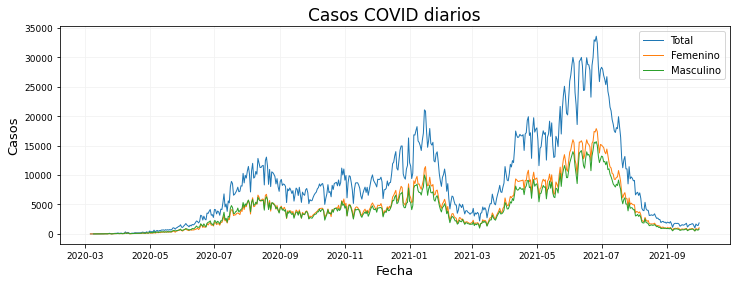

In [9]:
plt.figure(figsize=(12, 4))
plt.grid(color='#F2F2F2', alpha=1, zorder=0)
plt.plot(casos_total.index, casos_total, lw=1, zorder=5)
plt.plot(casos_fem.index, casos_fem, lw=1, zorder=5)
plt.plot(casos_mas.index, casos_mas, lw=1, zorder=5)
plt.title('Casos COVID diarios', fontsize=17)
plt.xlabel('Fecha', fontsize=13)
plt.xticks(fontsize=9)
plt.ylabel('Casos', fontsize=13)
plt.yticks(fontsize=9)
plt.legend(['Total','Femenino','Masculino'])
plt.savefig('casos_diarios.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

Ahora se extraen los totales de casos activos, recuperados, fallecidos y otros.

In [10]:
labels = data['recuperado'].unique()
totales = [data[data['recuperado']=='recuperado'].shape[0],\
           data[data['recuperado']=='fallecido'].shape[0],\
           data[data['recuperado']=='activo'].shape[0],\
           data[data['recuperado']=='n/a'].shape[0]]

In [11]:
labels

array(['recuperado', 'fallecido', 'n/a', 'activo'], dtype=object)

In [12]:
totales

[4801028, 126336, 15993, 15787]

Se grafican éstos resultados en un gráfico circular para visualizar los porcentajes de casos recuperados, fallecidos, activos y otros.

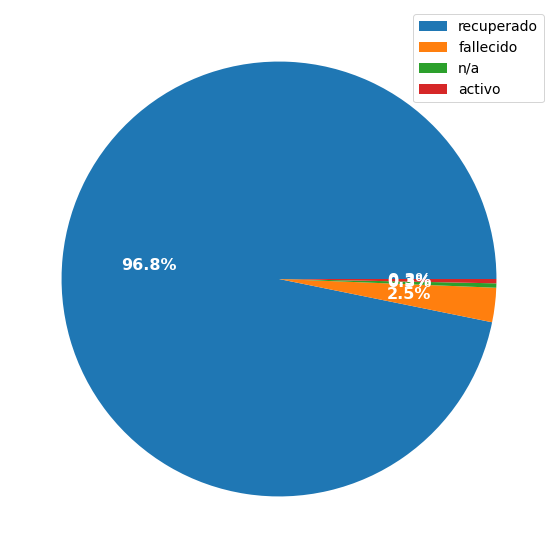

In [13]:
fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(totales, autopct=lambda pct: func(pct, totales),
                                  textprops=dict(color="w"))
ax.legend(wedges, labels,loc="upper right",title_fontsize=14,fontsize=14)
plt.setp(autotexts, size=16, weight="bold")
plt.savefig('distribucion_confirmados.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

Finalmente, se desea visualizar la distribución de casos positivos por edad y género. Para hacerlo se agrupan los datos de la siguiente forma:

In [14]:
distribucion_edad = data.groupby('edad').size()
distribucion_edad_fem = data[data['sexo']=='F'].groupby('edad').size()
distribucion_edad_mas = data[data['sexo']=='M'].groupby('edad').size()

In [16]:
distribucion_edad

edad
1      18011
2      16312
3      16163
4      16946
5      17863
       ...  
110        4
111        4
112        1
113        1
114        3
Length: 114, dtype: int64

Una vez se obtienen los datos, se grafica la distribución usando un gráfico de barras horizontales.

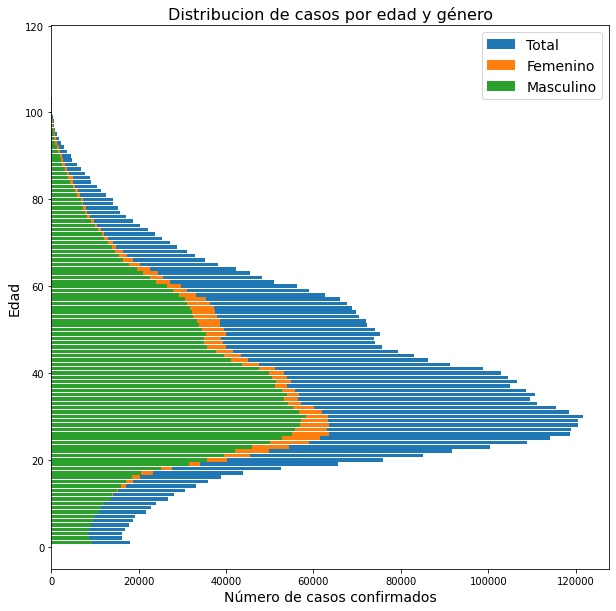

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(distribucion_edad.index, distribucion_edad)
ax.barh(distribucion_edad_fem.index, distribucion_edad_fem)
ax.barh(distribucion_edad_mas.index, distribucion_edad_mas)
ax.legend(['Total','Femenino', 'Masculino'],fontsize=14)
ax.set_xlabel('Número de casos confirmados',fontsize=14)
ax.set_ylabel('Edad',fontsize=14)
ax.set_title('Distribucion de casos por edad y género',fontsize=16)
plt.savefig('distribucion_edad_genero.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

Finalmente, se utiliza la librería `FPDF` para generar el reporte en formato pdf.

In [ ]:
!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=c278d167290bd9800b412cb444b4beadda95b3cc8920f09ad98f76ccf87ac13b
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [18]:
from fpdf import FPDF

class PDF(FPDF):
    def __init__(self):
        super().__init__()
        self.WIDTH = 210
        self.HEIGHT = 297
        
    def header(self):        
        self.image('logo_unad.jpg', 10, 4, 60)
        self.set_font('Arial', 'B', 11)
        self.cell(self.WIDTH - 80)
        self.cell(60, 1, 'Estadísticas COVID Colombia', 0, 0, 'R')
        self.ln(20)
        
    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.set_text_color(128)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

pdf = PDF()
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_font('Times', '', 12)
pdf.image('casos_diarios.png', 15, 35, 180)
pdf.image('distribucion_confirmados.png', 5, 135, 90)
pdf.image('distribucion_edad_genero.png', 105, 135, 90)
pdf.output('reporte_COVID.pdf', 'F')

''